W0000 00:00:1752157416.498033   14240 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/mnt/A04C91DC4C91AE12/Israil/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with single augmentation (horizontal flip)...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 167ms/step - accuracy: 0.3358 - loss: 1.7917 - val_accuracy: 0.5954 - val_loss: 1.1229
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.5822 - loss: 1.1689 - val_accuracy: 0.6854 - val_loss: 0.9033
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 165ms/step - accuracy: 0.6512 - loss: 0.9858 - val_accuracy: 0.7040 - val_loss: 0.8453
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.6944 - loss: 0.8699 - val_accuracy: 0.7292 - val_loss: 0.7783
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 163ms/step - accuracy: 0.7138 - loss: 0.8227 - val_accuracy: 0.7586 - val_loss: 0.6950
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.7316 - loss: 0.7655 - val_accuracy: 0.7608 - val_loss: 0.6911
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.7473 - loss: 0.7197 - val_accuracy: 0.7689 - val_loss: 0.6656
Epoch 8/15
782/782 ━

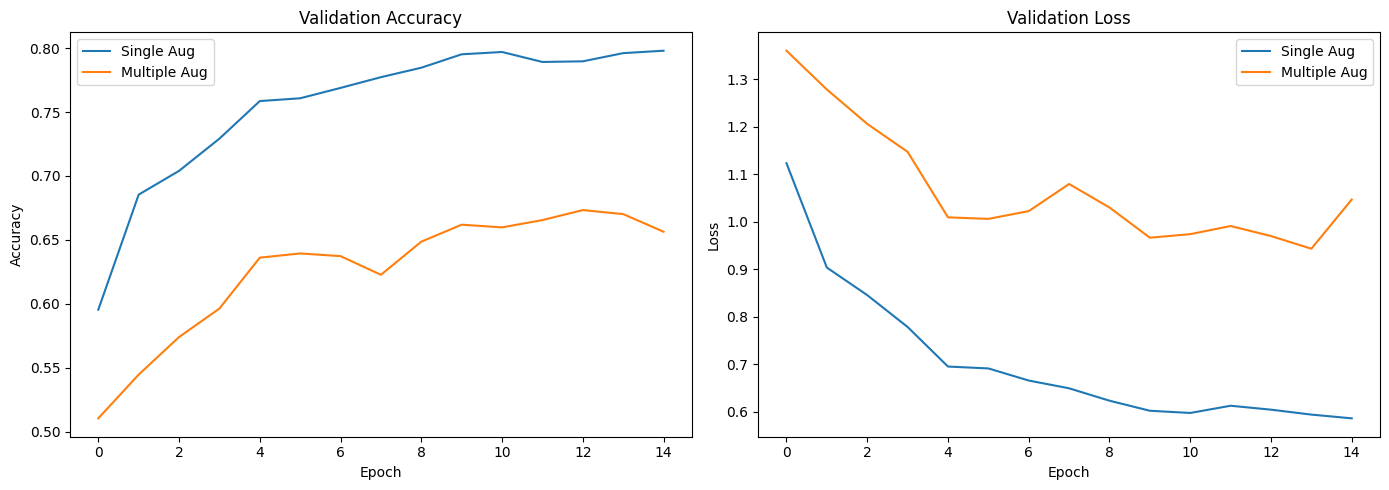


Evaluating Single Augmentation Model...
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


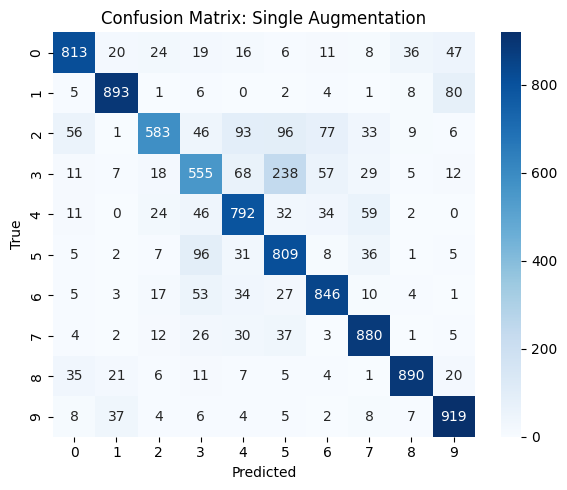

              precision    recall  f1-score   support

           0     0.8531    0.8130    0.8326      1000
           1     0.9057    0.8930    0.8993      1000
           2     0.8376    0.5830    0.6875      1000
           3     0.6424    0.5550    0.5955      1000
           4     0.7367    0.7920    0.7634      1000
           5     0.6436    0.8090    0.7169      1000
           6     0.8088    0.8460    0.8270      1000
           7     0.8263    0.8800    0.8523      1000
           8     0.9242    0.8900    0.9068      1000
           9     0.8393    0.9190    0.8773      1000

    accuracy                         0.7980     10000
   macro avg     0.8018    0.7980    0.7958     10000
weighted avg     0.8018    0.7980    0.7958     10000


Evaluating Multiple Augmentation Model...
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


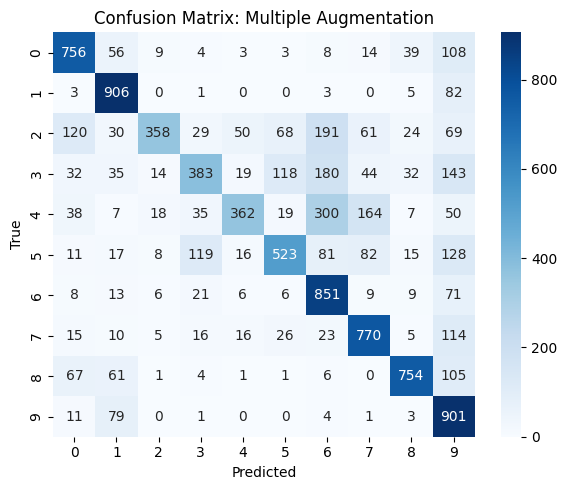

              precision    recall  f1-score   support

           0     0.7125    0.7560    0.7336      1000
           1     0.7463    0.9060    0.8184      1000
           2     0.8544    0.3580    0.5046      1000
           3     0.6248    0.3830    0.4749      1000
           4     0.7653    0.3620    0.4915      1000
           5     0.6846    0.5230    0.5930      1000
           6     0.5167    0.8510    0.6430      1000
           7     0.6725    0.7700    0.7179      1000
           8     0.8443    0.7540    0.7966      1000
           9     0.5088    0.9010    0.6503      1000

    accuracy                         0.6564     10000
   macro avg     0.6930    0.6564    0.6424     10000
weighted avg     0.6930    0.6564    0.6424     10000



In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Build CNN Model 
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Load and Normalize CIFAR-10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Single Augmentation: Horizontal Flip 
data_augment_single = tf.keras.Sequential([
    layers.RandomFlip("horizontal")
])

train_ds_single = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds_single = train_ds_single.shuffle(10000).batch(64).map(
    lambda x, y: (data_augment_single(x), y), num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

# Train Model A (Single Augmentation) 
model_single = build_cnn_model()
model_single.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

print("\nTraining with single augmentation (horizontal flip)...")
history_single = model_single.fit(train_ds_single,
                                  epochs=15,
                                  validation_data=test_ds)

# Multiple Augmentations 
data_augment_multi = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])

train_ds_multi = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds_multi = train_ds_multi.shuffle(10000).batch(64).map(
    lambda x, y: (data_augment_multi(x), y), num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

# Train Model B (Multiple Augmentations) 
model_multi = build_cnn_model()
model_multi.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

print("\nTraining with multiple augmentations...")
history_multi = model_multi.fit(train_ds_multi,
                                epochs=15,
                                validation_data=test_ds)

# Plot Accuracy & Loss 
def plot_history(histories, titles):
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    for hist, title in zip(histories, titles):
        plt.plot(hist.history['val_accuracy'], label=f"{title}")
    plt.title("Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    for hist, title in zip(histories, titles):
        plt.plot(hist.history['val_loss'], label=f"{title}")
    plt.title("Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history_single, history_multi], ["Single Aug", "Multiple Aug"])

# Evaluate with Confusion Matrix 
def get_predictions(model, x_test):
    y_pred_probs = model.predict(x_test, batch_size=64)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    return y_pred_classes

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=range(10), yticklabels=range(10))
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# Confusion matrix and classification report
print("\nEvaluating Single Augmentation Model...")
y_pred_single = get_predictions(model_single, x_test)
plot_confusion_matrix(y_test, y_pred_single, "Single Augmentation")
print(classification_report(y_test, y_pred_single, digits=4))

print("\nEvaluating Multiple Augmentation Model...")
y_pred_multi = get_predictions(model_multi, x_test)
plot_confusion_matrix(y_test, y_pred_multi, "Multiple Augmentation")
print(classification_report(y_test, y_pred_multi, digits=4))
